In [17]:
bids_folder = '/data/ds-tmsrisk/'
import os.path as op
import arviz as az

from tms_risk.cogmodels.fit_model import build_model, get_data
import pymc as pm
import matplotlib.pyplot as plt


In [12]:
model_label = 'session1_full'
df = get_data(model_label=model_label)
model1 = build_model(model_label, df)
idata1 = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

model_label = 'session1_simple'
model2 = build_model(model_label, df)
idata2 = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

model_label = 'session1_different_priors'
model3 = build_model(model_label, df)
idata3 = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

model_label = 'session1_different_evidence'
model4 = build_model(model_label, df)
idata4 = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:150: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


In [13]:
for model, idata in zip([model1, model2, model3, model4], [idata1, idata2, idata3, idata4]):
    model.build_estimation_model()
    with model.estimation_model:
        pm.compute_log_likelihood(idata)

In [21]:
models = {'Full model': idata1, 'Khaw et al., 2017-model': idata2, 'Only different priors': idata3, 'Only different evidence': idata4}

comparison = az.compare(models)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


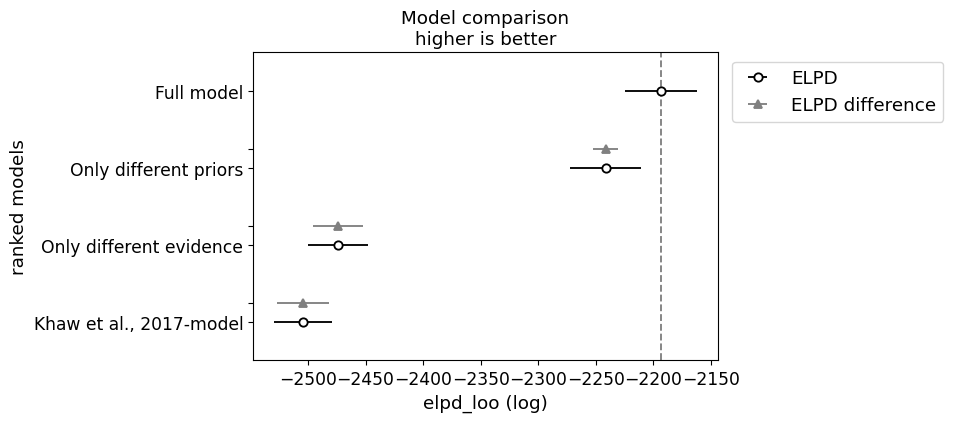

In [22]:
az.plot_compare(comparison)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'model_comparison_session1.png'), bbox_inches='tight')
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'model_comparison_session1.pdf'), bbox_inches='tight')

In [16]:
comparison

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Full model,0,-2193.435208,114.651184,0.000000,0.920394,31.396319,0.000000,False,log
Only different priors,1,-2241.320183,76.314234,47.884974,0.071993,30.666024,10.627309,False,log
Only different evidence,2,-2474.112594,71.329427,280.677385,0.000024,26.007216,21.706010,True,log
Simple model,3,-2504.206535,46.969719,310.771327,0.007589,25.183007,22.607034,False,log
